### Intelligence, size and popularity of dog breeds

Dogs have always been regarded as man's best friends. There are many breeds of dogs in different shapes and sizes with varying levels of intelligence and trainability. With regards to all these, some breeds tend to be more popular than others. What is the reason behind the popularity of some breeds. This project attempts to answer this question using data. The data used in this project was collected from three different sources, cleaned, transformed and combined to form the final data that was used to test the following hypotheses:

- Intelligent dogs are more popular than non-intelligent dogs
- Big dogs are more popular than small dogs
- Size is correlated to intelligence of the dogs


Visit: https://www.josephsegbefia.me - My data science portfolio website.

### Part One

This part deals with:
- Joining the different datasets into one
- Manipulating the data
- Extensive cleaning


to put the data in the right format and state for EDA and more..

In [1]:
#Importing pandas
import pandas as pd

The first dataset was obtained from a research conducted by Cohen in 1994. His work can be assessed on wikipedia at 
https://en.wikipedia.org/wiki/The_Intelligence_of_Dogs

In [2]:
#Reading the first data file as a csv. It contains information on the intelligence of the different breeds of dogs

dog_intel = pd.read_csv('data/dog_intelligence.csv')

#Information on the data
dog_intel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   breed           136 non-null    object
 1   classification  136 non-null    object
 2   obey_rate       125 non-null    object
 3   lower_reps      136 non-null    int64 
 4   upper_reps      136 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 5.4+ KB


In [3]:
#Looking at the first few rows of the data
dog_intel.head(6)

,breed,classification,obey_rate,lower_reps,upper_reps
0,Border Collie,Brightest Dogs,95%,1,4
1,Poodle,Brightest Dogs,95%,1,4
2,German Shepherd,Brightest Dogs,95%,1,4
3,Golden Retriever,Brightest Dogs,95%,1,4
4,Doberman Pinscher,Brightest Dogs,95%,1,4
5,Shetland Sheepdog,Brightest Dogs,95%,1,4


In [4]:
#Checking for missing values
dog_intel.isna().sum()

breed              0
classification     0
obey_rate         11
lower_reps         0
upper_reps         0
dtype: int64

The obey_rate column has 11 missing values.

In [5]:
#Looking at the rows with the missing values

null = dog_intel.isna().any(axis = 1)
null_rows = dog_intel[null]
null_rows

,breed,classification,obey_rate,lower_reps,upper_reps
125,Shih Tzu,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
126,Basset Hound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
127,Mastiff,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
128,Beagle,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
129,Pekingese,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
130,Bloodhound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
131,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
132,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
133,Bulldog,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
134,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100


In [6]:
#Replacing the NaN with '0%'

dog_intel.fillna('0%', inplace = True)

In [7]:
#Checking if the replacement worked

dog_intel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   breed           136 non-null    object
 1   classification  136 non-null    object
 2   obey_rate       136 non-null    object
 3   lower_reps      136 non-null    int64 
 4   upper_reps      136 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 5.4+ KB


In [8]:
dog_intel.isna().sum()

breed             0
classification    0
obey_rate         0
lower_reps        0
upper_reps        0
dtype: int64

Missing values have replaced with 0% as evident above with no missing values.

The second dataset which is about the weights/sizes of the different breeds of dogs was obtained from the American Kennel Club. 

https://www.akc.org/expert-advice/nutrition/breed-weight-chart/

The last dataset concerned with the popularity of the different breeds was also collected from the American Kennel Club

https://www.akc.org/expert-advice/news/most-popular-dog-breeds-full-ranking-list/

In [9]:
#Reading the weight data as a dataframe (Second dataset)

dog_weight = pd.read_csv('data/breedweight.csv')

#Looking at the first few rows of the data
dog_weight.head()

,Breed,Weight Male,Weight Female
0,Affenpinschers,7-10 pounds,7-10 pounds
1,Afghan Hounds,50-60 pounds,50-60 pounds
2,Airedale Terriers,50-70 pounds,50-70 pounds
3,Akitas,100-130 pounds,70-100 pounds
4,Alaskan Malamutes,85 pounds,75 pounds


In [10]:
#dog weight dataset information
dog_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Breed          189 non-null    object
 1   Weight Male    189 non-null    object
 2   Weight Female  189 non-null    object
dtypes: object(3)
memory usage: 4.6+ KB


In [11]:
#Checking for missing values
dog_weight.isna().sum()

Breed            0
Weight Male      0
Weight Female    0
dtype: int64

The first dataset (`dog_intel`) and the second dataset (`dog_weight`) will be merged together on a common column (`Breed`). But before this can be done the columns in both datasets must have the same capitalization. As it is now, the columns in the `dog_intel` are in lower case whereas the columns in `dog_weight` have the first letters capitalized. The columns in the `dog_intel` dataset will be transformed to match those of the `dog_weight`.

In [12]:
#Renaming columns in the dog_intel dataset

dog_intel.rename(columns = {'breed':'Breed',
                            'classification':'Classification',
                            'obey_rate':'Obey_Rate',
                            'lower_reps':'Lower_Reps',
                            'upper_reps': 'Upper_Reps'}, inplace = True)


#Checking if changes took effect
dog_intel.head(2)

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps
0,Border Collie,Brightest Dogs,95%,1,4
1,Poodle,Brightest Dogs,95%,1,4


In [13]:
#Merging the two datasets into one on the 'Breed' columns (dog_intel_weight)

dog_intel_weight = dog_intel.merge(dog_weight, on  = 'Breed')
dog_intel_weight.head()

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps,Weight Male,Weight Female
0,Belgian Malinois,Excellent Working Dogs,85%,5,15,60-80 pounds,40-60 pounds
1,Finnish Spitz,Average Working/Obedience Intelligence,50%,26,40,25-33 pounds,20-28 pounds
2,Tibetan Spaniel,Average Working/Obedience Intelligence,50%,26,40,9-15 pounds,9-15 pounds
3,Havanese,Average Working/Obedience Intelligence,50%,26,40,7-13 pounds,7-13 pounds
4,Shiba Inu,Average Working/Obedience Intelligence,50%,26,40,23 pounds,17 pounds


Though the `Breed` columns contains almost the same names for the different breeds of dogs available, some of the names in the weight dataset have a different representation to what is present in the intelligence dataset. For example in the weight dataset a breed coded as `Retrievers (Golden)` is supposed to mean `Golden Retriever` in the intelligence dataset. Because of the these subtle differences and others such as the breed names being in plural in the weight dataset and lastly, the plural form for non-english breeds do not end with an s, they have a different form e.g `Puli` in the intelligence dataset vs `Pulik` in the weight dataset did not produce the desirable merge. Other differences in the pluralisation are `Keeshond` vs `Keeshonden`, `Komondor` vs `Komondorok`

In [14]:
# Proof of the above problem - Lets call this problem A 

#How retriever breeds are coded in the weight dataset
retrievers_weight_data = dog_weight[dog_weight['Breed'].str.contains('Retrievers')]
retrievers_weight_data

,Breed,Weight Male,Weight Female
133,Retrievers (Chesapeake Bay),65-80 pounds,55-70 pounds
134,Retrievers (Curly-Coated),60-95 pounds,60-95 pounds
135,Retrievers (Flat-Coated),60-70 pounds,60-70 pounds
136,Retrievers (Golden),65-75 pounds,55-65 pounds
137,Retrievers (Labrador),65-80 pounds,55-70 pounds
138,Retrievers (Nova Scotia Duck Tolling),35-50 pounds,35-50 pounds


In [15]:
#How retriever breeds are coded in the intelligence dataset

retrievers_intel_data = dog_intel[dog_intel['Breed'].str.contains('Retriever')]
retrievers_intel_data

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps
3,Golden Retriever,Brightest Dogs,95%,1,4
6,Labrador Retriever,Brightest Dogs,95%,1,4
19,Flat-Coated Retriever,Excellent Working Dogs,85%,5,15
31,Chesapeake Bay Retriever,Above Average Working Dogs,70%,16,25
64,Curly Coated Retriever,Average Working/Obedience Intelligence,50%,26,40


In [16]:
#Proof of pluralisation in the weight data - Lets call this problem B

plural_breeds = dog_weight[dog_weight['Breed'].str[-1] == 's']['Breed']
plural_breeds

0                    Affenpinschers
1                     Afghan Hounds
2                 Airedale Terriers
3                            Akitas
4                 Alaskan Malamutes
                   ...             
183    West Highland White Terriers
184                        Whippets
185    Wirehaired Pointing Griffons
186              Wirehaired Vizslas
188              Yorkshire Terriers
Name: Breed, Length: 141, dtype: object

In [17]:
#Non pluralised breeds in the intelligence dataset
singular_breeds = dog_intel['Breed']
singular_breeds

0          Border Collie
1                 Poodle
2        German Shepherd
3       Golden Retriever
4      Doberman Pinscher
             ...        
131               Borzoi
132            Chow Chow
133              Bulldog
134              Basenji
135         Afghan Hound
Name: Breed, Length: 136, dtype: object

In [18]:
#Proof pluralisation of non-english name breeds - Lets call this problem C
plural_non_english_breeds = ['Keeshonden', 'Komondorok', 'Pulik']

non_eng_plu = dog_weight[dog_weight['Breed'].isin(plural_non_english_breeds)]
non_eng_plu

,Breed,Weight Male,Weight Female
87,Keeshonden,35-45 pounds,35-45 pounds
89,Komondorok,100 pounds or more,80 pounds or more
128,Pulik,25-35 pounds,25-35 pounds


In [19]:
#Proof pluralisation of non-english name breeds
singular_non_english_breeds = ['Keeshond', 'Komondor', 'Puli']
non_eng_sing = dog_intel[dog_intel['Breed'].isin(singular_non_english_breeds)]
non_eng_sing

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps
17,Keeshond,Excellent Working Dogs,85%,5,15
32,Puli,Above Average Working Dogs,70%,16,25


To solve problem A i.e for example to change `Retrievers (Golden)` in the weight dataset to `Golden Retrievers` in the intelligence dataset, the parentheses in the name will be removed and the name `Retrievers (Golden)` will be turned around to become `Golden Retrievers`.

To resolve problem B, the letter `s` at the end of the breed names in the weight dataset will be dropped to convert them to singular.

In [20]:
#Resolving problem A

new_breed_list = []
char = ['(']

for item in dog_weight['Breed']:
    for char in char:
        if char not in item:
            new_breed_list.append(item)
        else:
            sub_list = []
            sub_item  = item.split(char)
            sub_list.append(sub_item)
            for word in sub_list:
                rev = list(reversed(word))
                final = ' '.join(rev)
                final = final.replace(')', '').strip(' ')
                new_breed_list.append(final)
                

#make the new_breed_list the new Breed column of the weight dataset
dog_weight['Breed'] = new_breed_list

In [21]:
#verifying if changes took place

retrievers_weight_data = dog_weight[dog_weight['Breed'].str.contains('Retrievers')]
retrievers_weight_data

,Breed,Weight Male,Weight Female
133,Chesapeake Bay Retrievers,65-80 pounds,55-70 pounds
134,Curly-Coated Retrievers,60-95 pounds,60-95 pounds
135,Flat-Coated Retrievers,60-70 pounds,60-70 pounds
136,Golden Retrievers,65-75 pounds,55-65 pounds
137,Labrador Retrievers,65-80 pounds,55-70 pounds
138,Nova Scotia Duck Tolling Retrievers,35-50 pounds,35-50 pounds


Changes took place without errors as can be seen for example `Retrievers (Chesapeake Bay)` changed to `Chesapeake Bay Retrievers` and also `Retrievers (Curly-Coated)` changed to `Curly-Coated Retrievers`.

In [22]:
#Resolving Problem B

breed_without_s = []
for breed in dog_weight['Breed']:
    if breed[-1] != 's':
        breed_without_s.append(breed)
    else:
        without_s = breed[0: len(breed)-1]
        breed_without_s.append(without_s)

#Using the breed_without_s list as the new Breed column
dog_weight['Breed'] = breed_without_s

In [23]:
#Checking if changes took place
dog_weight['Breed']

0                    Affenpinscher
1                     Afghan Hound
2                 Airedale Terrier
3                            Akita
4                 Alaskan Malamute
                  ...             
184                        Whippet
185    Wirehaired Pointing Griffon
186              Wirehaired Vizsla
187                 Xoloitzcuintli
188              Yorkshire Terrier
Name: Breed, Length: 189, dtype: object

All breeds with the letter `s` at the ending have been dropped without errors.

In [24]:
#Merging the dataframes again to see if eeverything is covered.

dog_intel_weight = dog_intel.merge(dog_weight, on  = 'Breed')
dog_intel_weight.head()

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps,Weight Male,Weight Female
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40..."
2,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds
3,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds
4,Shetland Sheepdog,Brightest Dogs,95%,1,4,15-25 pounds,15-25 pounds


In [25]:
dog_intel_weight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Breed           115 non-null    object
 1   Classification  115 non-null    object
 2   Obey_Rate       115 non-null    object
 3   Lower_Reps      115 non-null    int64 
 4   Upper_Reps      115 non-null    int64 
 5   Weight Male     115 non-null    object
 6   Weight Female   115 non-null    object
dtypes: int64(2), object(5)
memory usage: 7.2+ KB


To really be sure if the merge worked as expected, the `Breed` column the intelligence dataframe will be compared to the `Breed` column of the merged dataframes. This would be done by finding the difference between them. This difference will be compared to the `Breed` column in the weight dataframe and the differences in the weight dataframe changed to suit it. This is to solve problem C

In [26]:
#Differences between the dog_intel data and dog_intel_weight data

difference = set(dog_intel['Breed']).difference(set(dog_intel_weight['Breed']))
print(difference)

{'Curly Coated Retriever', 'German Shepherd', 'Fox Terrier (Smooth)', 'Jack Russell terrier', 'Griffon Bruxellois', 'Kuvasz', 'Soft-coated Wheaten Terrier', 'Belgian Malinois', 'Keeshond', 'Bichon Frise', 'Belgian Shepherd Dog (Tervuren)', 'King Charles Spaniel', 'Siberian Husky', 'Great Pyrenees', 'Puli', 'Chinese Shar Pei', 'Petit Basset Griffon Vendeen', 'Australian Silky Terrier', 'Bouvier des Flandres', 'Cocker Spaniel', 'Saint Bernard'}


These are the breeds present in the intelligence dataframe and not in the merge. This is because these breeds are represented differently in the weight dataframe. It is now time to find those differences and change them to match the ones above. Since the difference is a just a handfull the comparison can be done by meticulous visual inspection. 

In [27]:
# Performing the remaining replacements in the weight dataframe
dog_weight['Breed'].replace('German Shepherd Dog', 'German Shepherd', inplace = True)
dog_weight['Breed'].replace('Belgian Tervuren', 'Belgian Shepherd Dog (Tervuren)', inplace = True)
dog_weight['Breed'].replace('Keeshonden', 'Keeshond', inplace = True)
dog_weight['Breed'].replace('Belgian Malinoi', 'Belgian Malinois', inplace = True)
dog_weight['Breed'].replace('Pulik', 'Puli', inplace = True)
dog_weight['Breed'].replace('Bouviers des Flandre', 'Bouvier des Flandres', inplace = True)
dog_weight['Breed'].replace('Australian Terrier', 'Australian Silky Terrier', inplace = True)
dog_weight['Breed'].replace('Silky Terrier', 'Australian Silky Terrier', inplace = True)
dog_weight['Breed'].replace('Soft Coated Wheaten Terrier', 'Soft-coated Wheaten Terrier', inplace = True)
dog_weight['Breed'].replace('Smooth Fox Terrier', 'Fox Terrier (Smooth)', inplace = True)
dog_weight['Breed'].replace('Curly-Coated Retriever', 'Curly Coated Retriever', inplace = True)
dog_weight['Breed'].replace('Kuvaszok', 'Kuvasz', inplace = True)
dog_weight['Breed'].replace('Siberian Huskie', 'Siberian Husky', inplace = True)
dog_weight['Breed'].replace('Bichons Frise', 'Bichon Frise', inplace = True)
dog_weight['Breed'].replace('Russell Terrier', 'Jack Russell terrier', inplace = True)
dog_weight['Breed'].replace('Chinese Shar-Pei', 'Chinese Shar Pei', inplace = True)
dog_weight['Breed'].replace('Brussels Griffon', 'Griffon Bruxellois', inplace = True)
dog_weight['Breed'].replace('Petits Bassets Griffons Vendeen', 'Petit Basset Griffon Vendeen', inplace = True)
dog_weight['Breed'].replace('Great Pyrenee', 'Great Pyrenees', inplace = True)
dog_weight['Breed'].replace('St. Bernard', 'Saint Bernard', inplace = True)

Now that most of the neccessary changes have been handled, the dataframes will be merged again and the differences checked again to see if something is left out.

In [28]:
dog_intel_weight = dog_intel.merge(dog_weight, on  = 'Breed')
dog_intel_weight.head()

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps,Weight Male,Weight Female
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40..."
2,German Shepherd,Brightest Dogs,95%,1,4,65-90 pounds,50-70 pounds
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds


In [29]:
difference = set(dog_intel['Breed']).difference(set(dog_intel_weight['Breed']))
print(difference)

{'Australian Terrier', 'King Charles Spaniel', 'Cocker Spaniel'}


The remaining breeds that did not match is because of the following:
- The `dog_weight` dataframe has no information on the `Cocker Spaniel`, `King Charles Spaniel Breed` and the `Australian Terrier` breeds.
- Since this in an inner join, the join only deals with values present in joining columns of both dataframes and leaves out unmatching values.

In [30]:
#Inspecting the merged dataframe

dog_intel_weight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Breed           134 non-null    object
 1   Classification  134 non-null    object
 2   Obey_Rate       134 non-null    object
 3   Lower_Reps      134 non-null    int64 
 4   Upper_Reps      134 non-null    int64 
 5   Weight Male     134 non-null    object
 6   Weight Female   134 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.4+ KB


A proper merge has been achieved after going through the steps above. It is now time to bring in the last dataset. The popularity dataset. 

In [31]:
#Loading the popularity data into a dataframe

popularity = pd.read_csv('data/breedpopularity.csv')

In [32]:
popularity.head()

,Breed,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank
0,Labrador Retrievers,1,1.0,1.0,1.0,1.0
1,German Shepherd Dogs,2,2.0,2.0,2.0,2.0
2,Golden Retrievers,3,3.0,3.0,3.0,3.0
3,French Bulldogs,4,4.0,6.0,6.0,9.0
4,Bulldogs,5,5.0,4.0,4.0,4.0


In [33]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Breed      192 non-null    object 
 1   2018 Rank  192 non-null    int64  
 2   2017 Rank  190 non-null    float64
 3   2016 Rank  189 non-null    float64
 4   2015 Rank  184 non-null    float64
 5   2014 Rank  184 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.1+ KB


In [34]:
#investigating null values
popularity.isna().sum()

Breed        0
2018 Rank    0
2017 Rank    2
2016 Rank    3
2015 Rank    8
2014 Rank    8
dtype: int64

Looking at the `Breed` column in the popularity dataframe it can be seen that the breeds have been pluralised `(Problem B)`. Since this dataframe will also be merged with the `dog_intel_weight` dataframe the breed names must be made single.

In [35]:
breed_without_s = []
for breed in popularity['Breed']:
    if breed[-1] != 's':
        breed_without_s.append(breed)
    else:
        without_s = breed[0: len(breed)-1]
        breed_without_s.append(without_s)

#Using the breed_without_s list as the new Breed column
popularity['Breed'] = breed_without_s

In [36]:
#Verifying changes
popularity['Breed']

0       Labrador Retriever
1      German Shepherd Dog
2         Golden Retriever
3           French Bulldog
4                  Bulldog
              ...         
187       English Foxhound
188                Harrier
189                Chinook
190    Norwegian Lundehund
191                Sloughi
Name: Breed, Length: 192, dtype: object

In [37]:
#Merging the popularity data on the dog_intel_weight data

final_data = dog_intel_weight.merge(popularity, on = 'Breed')
final_data.head()

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps,Weight Male,Weight Female,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0
2,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0
3,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds,17,16.0,15.0,14.0,14.0
4,Shetland Sheepdog,Brightest Dogs,95%,1,4,15-25 pounds,15-25 pounds,25,24.0,24.0,23.0,21.0


In [38]:
#Differences between the breed column in dog_intel_weight and popularity

diff = list(set(dog_intel_weight['Breed']).difference(set(popularity['Breed'])))
diff

['German Shepherd',
 'Fox Terrier (Smooth)',
 'Jack Russell terrier',
 'Belgian Shepherd Dog (Tervuren)',
 'Australian Silky Terrier',
 'Griffon Bruxellois',
 'Bouvier des Flandres',
 'Chinese Shar Pei',
 'Kuvasz',
 'Siberian Husky',
 'Great Pyrenees',
 'Pharaoh Hound',
 'Curly Coated Retriever',
 'Soft-coated Wheaten Terrier',
 'Belgian Malinois',
 'Puli',
 'Saint Bernard',
 'Keeshond']

These breeds are present in the `dog_intel_weight` dataframe but not in the `popularity` dataframe. Now, the breeds in the `popularity` dataframe can be compared to these and changes can be made manually.

In [39]:
popularity[popularity["Breed"].str.contains('Siberian')]

,Breed,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank
13,Siberian Huskie,14,12.0,12.0,12.0,13.0


Consider the row above from the popularity dataframe, it can be observed that, the breed `Siberian Huskie` lost the letter `s` when the breed names were singularized in a previous manipulation. Leaving it unable to match any row in the `dog_intel_weight` dataframe. The breed here, should be replaced with `Siberian Husky` in the `popularity` dataframe. 

In [40]:
popularity[popularity['Breed'].str.contains('Chinese')]

,Breed,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank
63,Chinese Shar-Pei,64,64.0,61.0,59.0,58.0
78,Chinese Crested,79,79.0,77.0,75.0,65.0


Looking at the rows above specifically the one at index 63, the `Chinese Shar-Pei` breed is coded as `Chinese Shar Pei` in the `dog_intel_weight` dataframe. The rest of breeds can be investigated as the previous ones and manually changed since the number of rows involved is not too much to handle manually.

In [41]:
#Performing the remaining replacements in the popularity dataframe
popularity['Breed'].replace('Siberian Huskie', 'Siberian Husky', inplace = True)
popularity['Breed'].replace('Chinese Shar-Pei', 'Chinese Shar Pei', inplace = True)
popularity['Breed'].replace('Pharoah Hound', 'Pharaoh Hound', inplace = True)
popularity['Breed'].replace('Belgian Malinoi', 'Belgian Malinois', inplace = True)
popularity['Breed'].replace('St. Bernard', 'Saint Bernard', inplace = True)
popularity['Breed'].replace('German Shepherd Dog', 'German Shepherd', inplace = True)
popularity['Breed'].replace('Curly-Coated Retriever', 'Curly Coated Retriever', inplace = True)
popularity['Breed'].replace('Smooth Fox Terrier', 'Fox Terrier (Smooth)', inplace = True)
popularity['Breed'].replace('Pulik', 'Puli', inplace = True)
popularity['Breed'].replace('Soft Coated Wheaten Terrier', 'Soft-coated Wheaten Terrier', inplace = True)
popularity['Breed'].replace('Bouviers des Flandre', 'Bouvier des Flandres', inplace = True)
popularity['Breed'].replace('Kuvaszok', 'Kuvasz', inplace = True)
popularity['Breed'].replace('Australian Terrier', 'Australian Silky Terrier', inplace = True)
popularity['Breed'].replace('Russell Terrier', 'Jack Russell terrier', inplace = True)
popularity['Breed'].replace('Belgian Tervuren', 'Belgian Shepherd Dog (Tervuren)', inplace = True)
popularity['Breed'].replace('Great Pyrenee', 'Great Pyrenees', inplace = True)
popularity['Breed'].replace('Keeshonden', 'Keeshond', inplace = True)
popularity['Breed'].replace('Brussels Griffon', 'Griffon Bruxellois', inplace = True)

In [42]:
#Merging the data again 


#Merging the popularity data on the dog_intel_weight data

final_data = dog_intel_weight.merge(popularity, on = 'Breed')
final_data.head()

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps,Weight Male,Weight Female,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0
2,German Shepherd,Brightest Dogs,95%,1,4,65-90 pounds,50-70 pounds,2,2.0,2.0,2.0,2.0
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds,17,16.0,15.0,14.0,14.0


In [43]:
#Differences between the breed column in dog_intel_weight and popularity again

diff = list(set(dog_intel_weight['Breed']).difference(set(popularity['Breed'])))
diff

[]

This time no differences and the merge is perfect

In [44]:
final_data.isna().sum()

Breed             0
Classification    0
Obey_Rate         0
Lower_Reps        0
Upper_Reps        0
Weight Male       0
Weight Female     0
2018 Rank         0
2017 Rank         0
2016 Rank         0
2015 Rank         0
2014 Rank         0
dtype: int64

The final dataset (`final_data`) after merging all the three datasets has columns `Weight Male` and `Weight Female`. In order to be able to work with these columns, they must transformed:
- The intergers must be extracted from these columns and stored in a newly created column
- If the number of integers extracted is more than 1 then the average of the first 2 will be used as the weight of that particular observation and stored in a new column called Male Average or Female Average else the single number is used as average.
- The data types of the average columns must be changed to integer.

In [45]:
#Creating a column to store the extracted integers from the Weight Male and Weight Female columns

import re

#For Weight Male
final_data['Male Range'] = final_data.apply(lambda row: re.findall(r'\b\d+\b', row['Weight Male']), axis = 1)

#For Weight Female
final_data['Female Range'] = final_data.apply(lambda row: re.findall(r'\b\d+\b', row['Weight Female']), axis = 1)

#Verify changes
final_data.head(3)

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps,Weight Male,Weight Female,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank,Male Range,Female Range
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0,"[30, 55]","[30, 55]"
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0,"[4, 6, 10, 15, 60, 70]","[4, 6, 10, 15, 40, 50]"
2,German Shepherd,Brightest Dogs,95%,1,4,65-90 pounds,50-70 pounds,2,2.0,2.0,2.0,2.0,"[65, 90]","[50, 70]"


In [46]:
#Make values in the Male Range and Female Range columns integers
final_data['Male Range'] = final_data.apply(lambda row: [int(x) for x in row['Male Range']], axis = 1)
final_data['Female Range'] = final_data.apply(lambda row: [int(x) for x in row['Female Range']], axis = 1)


#Creating the average weight columns
final_data['Male Average'] = final_data.apply(lambda row: (row['Male Range'][0] + row['Male Range'][1])/2 \
                                       if len(row['Male Range']) >= 2 else row['Male Range'][0], axis = 1)

# final_data['Female Average'] = final_data.apply(lambda row: (row['Female Range'][0] + row['Female Range'][1])/2 \
#                                        if len(row['Female Range']) >= 2 else row['Female Range'][0], axis = 1)

In [47]:
final_data['Male Average'].head()

0    42.5
1     5.0
2    77.5
3    70.0
4    87.5
Name: Male Average, dtype: float64

Trying to perform the same manipulations on the `Female Range` column to produce the average column will raise an error, meaning there is a problem within the `Female Range` column which must be investigated.

In [48]:
final_data['Female Range'].sample(15, random_state = 5)

35         [50, 70]
46         [45, 55]
109         [8, 12]
10             [28]
88     [16, 32, 11]
21         [30, 45]
60         [30, 35]
23         [55, 75]
70         [13, 18]
96             [45]
52         [12, 18]
92         [25, 40]
97               []
56         [45, 55]
25         [70, 95]
Name: Female Range, dtype: object

In [49]:
final_data[final_data.index.isin([97])]

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps,Weight Male,Weight Female,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank,Male Range,Female Range,Male Average
97,Welsh Terrier,Average Working/Obedience Intelligence,50%,26,40,20 pounds,proportionally smaller,107,109.0,111.0,108.0,106.0,[20],[],20.0


The above investigation reveals that some of the `Female Range` columns have empty lists. This may be caused by the corresponding `Weight Female` column not having any numerical data to extract. It will be ok to bring to light all these columns to understand the cause of the problem and find a solution.

In [50]:
#Retrieving rows with empty lists as Female Range
final_data[final_data.apply(lambda row: len(row['Female Range']) == 0, axis = 1)]

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps,Weight Male,Weight Female,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank,Male Range,Female Range,Male Average
48,Kerry Blue Terrier,Above Average Working Dogs,70%,16,25,33-40 pounds,females weigh slightly less than males,129,129.0,127.0,124.0,128.0,"[33, 40]",[],36.5
62,Fox Terrier (Smooth),Average Working/Obedience Intelligence,50%,26,40,18 pounds in show condition,two pounds less than male,123,122.0,124.0,122.0,124.0,[18],[],18.0
94,Wire Fox Terrier,Average Working/Obedience Intelligence,50%,26,40,18 pounds in show condition,two pounds less than male,101,99.0,101.0,94.0,95.0,[18],[],18.0
97,Welsh Terrier,Average Working/Obedience Intelligence,50%,26,40,20 pounds,proportionally smaller,107,109.0,111.0,108.0,106.0,[20],[],20.0
101,Skye Terrier,Fair Working/Obedience Intelligence,30%,41,80,35-45 pounds,slightly lighter,178,172.0,178.0,175.0,177.0,"[35, 45]",[],40.0
103,Sealyham Terrier,Fair Working/Obedience Intelligence,30%,41,80,23-24 pounds,slightly less,164,150.0,155.0,158.0,169.0,"[23, 24]",[],23.5
112,Tibetan Terrier,Fair Working/Obedience Intelligence,30%,41,80,18-30 pounds,slightly smaller,96,101.0,91.0,90.0,88.0,"[18, 30]",[],24.0
114,Lakeland Terrier,Fair Working/Obedience Intelligence,30%,41,80,17 pounds,slightly smaller,147,138.0,145.0,141.0,149.0,[17],[],17.0


The previous assumption that the empty lists are as a result of the `Weight Female` column not having numerical values to extract have proven to be true. To create the `Female Average` column as was done for the `Male Average`, the code used must be slightly modified to fill the rows in the `Female Average` column corresponding to the empty lists with `NaN`s   and dealing with the `NaN`s later.

In [51]:
import numpy as np
#Creating the Female Average column
final_data['Female Average'] = final_data.apply(lambda row: (row['Female Range'][0] + row['Female Range'][1])/2 \
                                  if len(row['Female Range']) >= 2 else np.nan if len(row['Female Range']) == 0 else row['Male Range'][0] , axis = 1
                                 )

In [52]:
#To clarify what was meant above
final_data[final_data.apply(lambda row: len(row['Female Range']) == 0, axis = 1)]

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps,Weight Male,Weight Female,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank,Male Range,Female Range,Male Average,Female Average
48,Kerry Blue Terrier,Above Average Working Dogs,70%,16,25,33-40 pounds,females weigh slightly less than males,129,129.0,127.0,124.0,128.0,"[33, 40]",[],36.5,NaN
62,Fox Terrier (Smooth),Average Working/Obedience Intelligence,50%,26,40,18 pounds in show condition,two pounds less than male,123,122.0,124.0,122.0,124.0,[18],[],18.0,NaN
94,Wire Fox Terrier,Average Working/Obedience Intelligence,50%,26,40,18 pounds in show condition,two pounds less than male,101,99.0,101.0,94.0,95.0,[18],[],18.0,NaN
97,Welsh Terrier,Average Working/Obedience Intelligence,50%,26,40,20 pounds,proportionally smaller,107,109.0,111.0,108.0,106.0,[20],[],20.0,NaN
101,Skye Terrier,Fair Working/Obedience Intelligence,30%,41,80,35-45 pounds,slightly lighter,178,172.0,178.0,175.0,177.0,"[35, 45]",[],40.0,NaN
103,Sealyham Terrier,Fair Working/Obedience Intelligence,30%,41,80,23-24 pounds,slightly less,164,150.0,155.0,158.0,169.0,"[23, 24]",[],23.5,NaN
112,Tibetan Terrier,Fair Working/Obedience Intelligence,30%,41,80,18-30 pounds,slightly smaller,96,101.0,91.0,90.0,88.0,"[18, 30]",[],24.0,NaN
114,Lakeland Terrier,Fair Working/Obedience Intelligence,30%,41,80,17 pounds,slightly smaller,147,138.0,145.0,141.0,149.0,[17],[],17.0,NaN


Every `Female Range` with an empty list now has a corresponding `NaN` value in the `Female Average`. This is what I meant above

In [53]:
#Verifying if the changes took place
final_data['Female Average'].head()

0    42.5
1     5.0
2    60.0
3    60.0
4    75.0
Name: Female Average, dtype: float64

To deal with the null values in the `Female Average` column, the values for the `Male Averages` in the same row can be used to replace the `NaN`s, because from reading the text in the `Weight Female` columns, it can be established that there isn't much difference in weight for the records in the same rows.

In [54]:
#Replacing the NaN in Female Average with Male Average in the same row
final_data['Female Average'] = final_data['Female Average'].fillna(value = final_data['Male Average'])

In [55]:
final_data[final_data.apply(lambda row: len(row['Female Range']) == 0, axis = 1)]

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps,Weight Male,Weight Female,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank,Male Range,Female Range,Male Average,Female Average
48,Kerry Blue Terrier,Above Average Working Dogs,70%,16,25,33-40 pounds,females weigh slightly less than males,129,129.0,127.0,124.0,128.0,"[33, 40]",[],36.5,36.5
62,Fox Terrier (Smooth),Average Working/Obedience Intelligence,50%,26,40,18 pounds in show condition,two pounds less than male,123,122.0,124.0,122.0,124.0,[18],[],18.0,18.0
94,Wire Fox Terrier,Average Working/Obedience Intelligence,50%,26,40,18 pounds in show condition,two pounds less than male,101,99.0,101.0,94.0,95.0,[18],[],18.0,18.0
97,Welsh Terrier,Average Working/Obedience Intelligence,50%,26,40,20 pounds,proportionally smaller,107,109.0,111.0,108.0,106.0,[20],[],20.0,20.0
101,Skye Terrier,Fair Working/Obedience Intelligence,30%,41,80,35-45 pounds,slightly lighter,178,172.0,178.0,175.0,177.0,"[35, 45]",[],40.0,40.0
103,Sealyham Terrier,Fair Working/Obedience Intelligence,30%,41,80,23-24 pounds,slightly less,164,150.0,155.0,158.0,169.0,"[23, 24]",[],23.5,23.5
112,Tibetan Terrier,Fair Working/Obedience Intelligence,30%,41,80,18-30 pounds,slightly smaller,96,101.0,91.0,90.0,88.0,"[18, 30]",[],24.0,24.0
114,Lakeland Terrier,Fair Working/Obedience Intelligence,30%,41,80,17 pounds,slightly smaller,147,138.0,145.0,141.0,149.0,[17],[],17.0,17.0


Now it can be confirmed that the `Female Average` is the same as the `Male Average` for the same row where the `Female Range` is an empty list.

In [56]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Breed           134 non-null    object 
 1   Classification  134 non-null    object 
 2   Obey_Rate       134 non-null    object 
 3   Lower_Reps      134 non-null    int64  
 4   Upper_Reps      134 non-null    int64  
 5   Weight Male     134 non-null    object 
 6   Weight Female   134 non-null    object 
 7   2018 Rank       134 non-null    int64  
 8   2017 Rank       134 non-null    float64
 9   2016 Rank       134 non-null    float64
 10  2015 Rank       134 non-null    float64
 11  2014 Rank       134 non-null    float64
 12  Male Range      134 non-null    object 
 13  Female Range    134 non-null    object 
 14  Male Average    134 non-null    float64
 15  Female Average  134 non-null    float64
dtypes: float64(6), int64(3), object(7)
memory usage: 17.8+ KB


Data is now ready for EDA, modelling and other cool stuff.

### END OF PART ONE

### Part 2

This part is about performing EDA and also answering the questions/hypotheses established in Part One using visualizations and data manipulations.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
final_data.head()

,Breed,Classification,Obey_Rate,Lower_Reps,Upper_Reps,Weight Male,Weight Female,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank,Male Range,Female Range,Male Average,Female Average
0,Border Collie,Brightest Dogs,95%,1,4,30-55 pounds,30-55 pounds,35,38.0,38.0,38.0,38.0,"[30, 55]","[30, 55]",42.5,42.5
1,Poodle,Brightest Dogs,95%,1,4,"4-6 pounds (toy), 10-15 pounds (miniature), 60...","4-6 pounds (toy), 10-15 pounds (miniature), 40...",7,7.0,7.0,8.0,7.0,"[4, 6, 10, 15, 60, 70]","[4, 6, 10, 15, 40, 50]",5.0,5.0
2,German Shepherd,Brightest Dogs,95%,1,4,65-90 pounds,50-70 pounds,2,2.0,2.0,2.0,2.0,"[65, 90]","[50, 70]",77.5,60.0
3,Golden Retriever,Brightest Dogs,95%,1,4,65-75 pounds,55-65 pounds,3,3.0,3.0,3.0,3.0,"[65, 75]","[55, 65]",70.0,60.0
4,Doberman Pinscher,Brightest Dogs,95%,1,4,75-100 pounds,60-90 pounds,17,16.0,15.0,14.0,14.0,"[75, 100]","[60, 90]",87.5,75.0


Before starting with any exploratory data analysis will be done, the `%` in the`Obey_Rate` has to be removed from the values and also converted from `str` to `int`.

In [59]:
#Remove the % from the column
final_data['Obey_Rate'] = final_data['Obey_Rate'].str.replace('%', '')

In [60]:
#Verifying changes
final_data['Obey_Rate'][0]

'95'

In [61]:
final_data['Obey_Rate'] = final_data['Obey_Rate'].astype('int')

The Exploratory Data Analysis will begin by looking at the counts of each classification in the dataset using horizontal barplots.

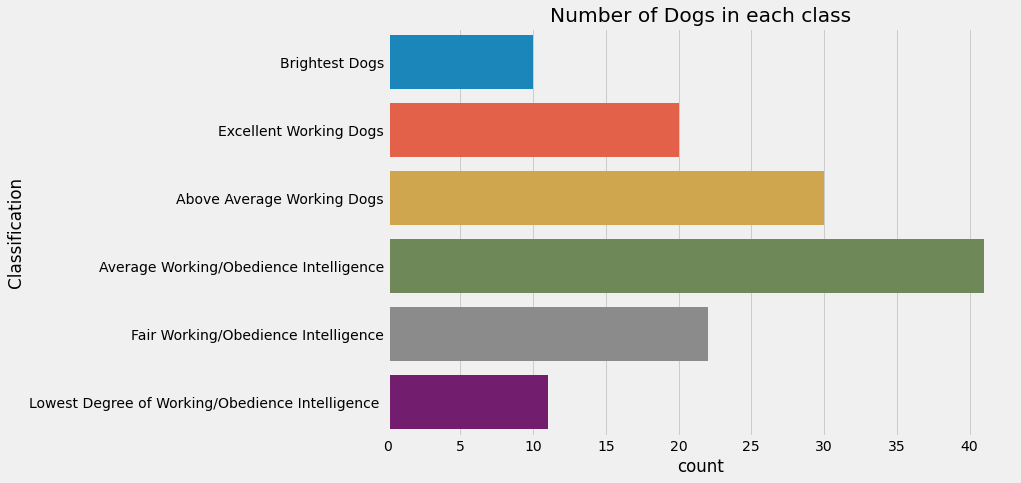

In [62]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 7))
sns.countplot(y = 'Classification', data = final_data)
plt.title('Number of Dogs in each class')
plt.savefig('Number_of_dogs_in_each_class.png')
plt.show()

The visualization above depicts how many times the different classification of dogs appear in the data. The most occuring classifcation is the `Average Working/Obedience Intelligence`. `Brightest Dogs` and `Lowest Degree of Working/Obedience Intelligence` are the least represented in the data. 

How are the weights for the male and female dogs distributed in the dataset? This will be investigated using a histograms.

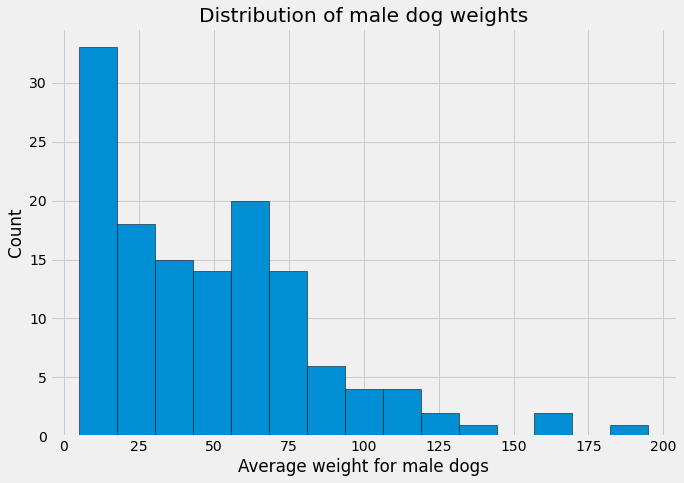

In [63]:
plt.figure(figsize = (10, 7))
plt.hist(final_data['Male Average'], edgecolor = 'black', bins = 15)
plt.xlabel('Average weight for male dogs')
plt.ylabel('Count')
plt.title('Distribution of male dog weights')
plt.show()

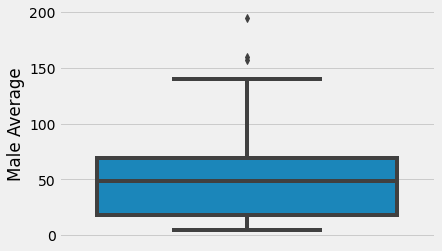

In [64]:
sns.boxplot(y = final_data['Male Average'])
plt.show()

The histogram indicates that majority of the male dogs present in the dataset weigh bewteen 5 pounds 60 pounds. There a few male dogs weighing above 150 pounds and some even weigh up to 200 pounds.

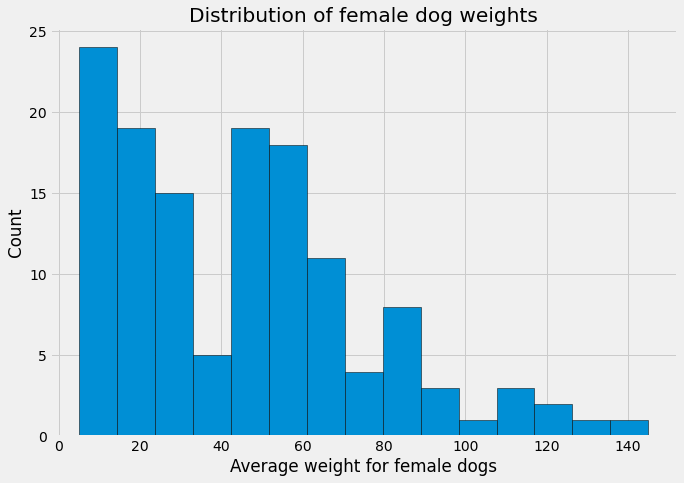

In [65]:
plt.figure(figsize = (10, 7))
plt.hist(final_data['Female Average'], edgecolor = 'black', bins = 15)
plt.xlabel('Average weight for female dogs')
plt.ylabel('Count')
plt.title('Distribution of female dog weights')
plt.show()

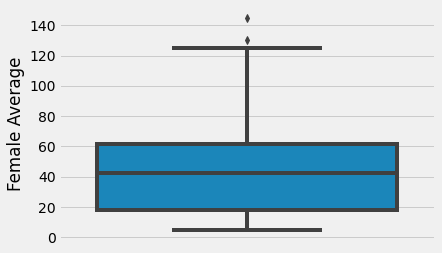

In [66]:
sns.boxplot(y = final_data['Female Average'])
plt.show()

#### What are the most popular breeds?
The most popular breeds will be investigated alongside their intelligence `(Obey Rate)`. The popularity ranks are such that the smaller the rank, the more popular the breed is. Only the 2018 Rank will be examined since it is the latest. The top 10 will be selected

In [67]:
#Most popular dogs in 2018
popularity_2018 = final_data[['Breed', '2018 Rank']].sort_values(by = '2018 Rank').head(20)
popularity_2018

,Breed,2018 Rank
6,Labrador Retriever,1
2,German Shepherd,2
3,Golden Retriever,3
105,French Bulldog,4
131,Bulldog,5
126,Beagle,6
1,Poodle,7
8,Rottweiler,8
18,German Shorthaired Pointer,9
32,Yorkshire Terrier,10


I personally thought the `German Shepherd` would be the most popular dog. Turns out the `Labrador Retriver` is the most popular dog in 2018. The next question one can ask is that, what makes the most popular dogs popular? Is it their intelligence? 

In [68]:
popularity_2018_intel = final_data[['Breed', '2018 Rank', 'Obey_Rate']].sort_values(by = ['2018 Rank', 'Obey_Rate'],\
                                                                                    ascending = [True, False]).head(20)
popularity_2018_intel

,Breed,2018 Rank,Obey_Rate
6,Labrador Retriever,1,95
2,German Shepherd,2,95
3,Golden Retriever,3,95
105,French Bulldog,4,30
131,Bulldog,5,0
126,Beagle,6,0
1,Poodle,7,95
8,Rottweiler,8,95
18,German Shorthaired Pointer,9,85
32,Yorkshire Terrier,10,70


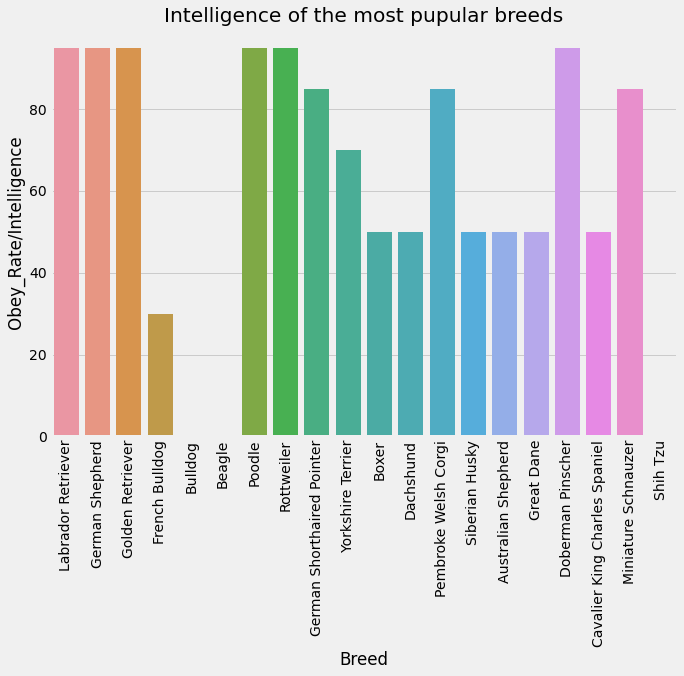

In [69]:
plt.figure(figsize = (10, 7))
sns.barplot(x='Breed', y='Obey_Rate', data = popularity_2018_intel)
plt.xticks(rotation = 90)
plt.title('Intelligence of the most pupular breeds')
plt.ylabel('Obey_Rate/Intelligence')
plt.show()

The visualization above is interesting, because though it appears that intelligence plays a role in a breed's popularity in 2018, it is not true for breeds such as the `Bulldog`, `Beagle`, `Boxer` and other breeds having `Obey Rate's` very much lower than the other popular dogs.  The breed `Boxer` for instance has a lower `Obey Rate` than the `Pembroke Welsh Corgi` but it is more popular. This could mean that there are other factors responsible for the popularity of breeds and not just their intelligence. A more obvious one is that of the `Bulldog`, `Beagle` and the `Poodle`.

#### Least Popular Dogs and their Intelligence

In [70]:
least_popularity_2018 = final_data[['Breed', '2018 Rank']].sort_values(by = '2018 Rank').tail(10)
least_popularity_2018

,Breed,2018 Rank
65,Kuvasz,163
103,Sealyham Terrier,164
73,American Water Spaniel,166
56,Pharaoh Hound,172
110,Dandie Dinmont Terrier,176
101,Skye Terrier,178
78,Otterhound,182
68,Finnish Spitz,184
80,American Foxhound,186
77,English Foxhound,188


The `Undersirable Number One Award` goes to the `English Foxfound`. It is the least popular breed in 2018. What makes it so unpopular?

In [71]:
least_popularity_2018_intel = final_data[['Breed', '2018 Rank', 'Obey_Rate']].sort_values(by = ['2018 Rank', 'Obey_Rate'],\
                                                                                    ascending = [True, False]).tail(20)
least_popularity_2018_intel

,Breed,2018 Rank,Obey_Rate
81,Greyhound,145,50
114,Lakeland Terrier,147,30
51,Affenpinscher,148,70
42,Field Spaniel,149,70
96,Ibizan Hound,152,50
111,Petit Basset Griffon Vendeen,156,30
85,Scottish Deerhound,158,50
27,Irish Water Spaniel,159,85
31,Puli,160,70
63,Curly Coated Retriever,162,50


#### Investigating the change in rank in breeds over the past years.
Which breed has the largest change in rank?

In [72]:
#Creating a column named 'Rank Change' from 2014 to 2018
final_data['Rank Change'] = final_data['2014 Rank'] - final_data['2018 Rank']
rank_change = final_data[['Breed', '2014 Rank', '2018 Rank', 'Rank Change']].sort_values(by = 'Rank Change', ascending = False)
rank_change.head(10)

,Breed,2014 Rank,2018 Rank,Rank Change
79,Jack Russell terrier,105.0,82,23.0
24,Belgian Malinois,60.0,43,17.0
67,Saluki,134.0,120,14.0
82,Wirehaired Pointing Griffon,76.0,65,11.0
29,Cardigan Welsh Corgi,78.0,68,10.0
25,Bernese Mountain Dog,32.0,22,10.0
59,Dalmatian,66.0,56,10.0
20,English Cocker Spaniel,62.0,52,10.0
41,Samoyed,68.0,59,9.0
116,Great Pyrenees,75.0,66,9.0


In [73]:
#Negative rank change
rank_change.tail(10)

,Breed,2014 Rank,2018 Rank,Rank Change
127,Pekingese,82.0,92,-10.0
68,Finnish Spitz,174.0,184,-10.0
58,Norwich Terrier,97.0,108,-11.0
7,Papillon,43.0,54,-11.0
113,Japanese Chin,93.0,104,-11.0
72,Black and Tan Coonhound,126.0,138,-12.0
42,Field Spaniel,137.0,149,-12.0
109,Chinese Crested,65.0,79,-14.0
45,Gordon Setter,100.0,115,-15.0
133,Afghan Hound,98.0,113,-15.0


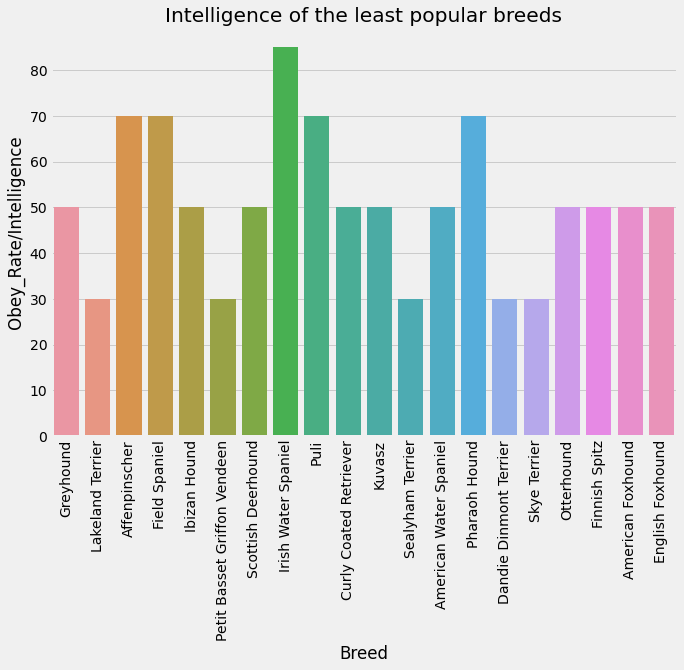

In [74]:
plt.figure(figsize = (10, 7))
sns.barplot(x='Breed', y='Obey_Rate', data = least_popularity_2018_intel)
plt.xticks(rotation = 90)
plt.title('Intelligence of the least popular breeds')
plt.ylabel('Obey_Rate/Intelligence')
plt.show()

The `English Foxhound` which is the least popular dog in the dataset, even has an `Obey Rate` higher than the `French Bulldog` which ranked as the 4th most popular breed. This goes to show that intelligence is not the sole driver of popularity.Intelligence plays some role in popularity but does not make a strong case for the popularity of breeds, as it is obvious other factors are affecting the popularity.

The dataframe above shows the `Breeds` with the biggest positive change in rank between 2014 and 2018. 

#### Is there a relationship between a breed's weight and its intelligence?

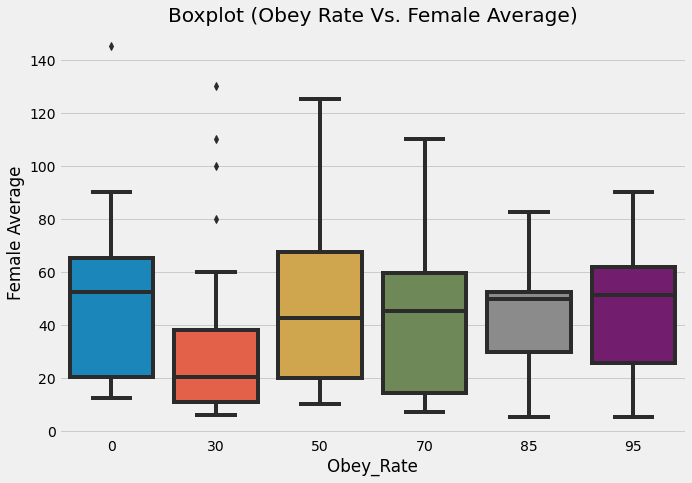

In [75]:
# Step 8a: Plot a boxplot of Female Average vs Obey_Rate
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'Obey_Rate', y ='Female Average', data = final_data)
plt.title('Boxplot (Obey Rate Vs. Female Average)')
plt.show()

There is no evident relationship between intelligence and weight among the female breeds of dogs.

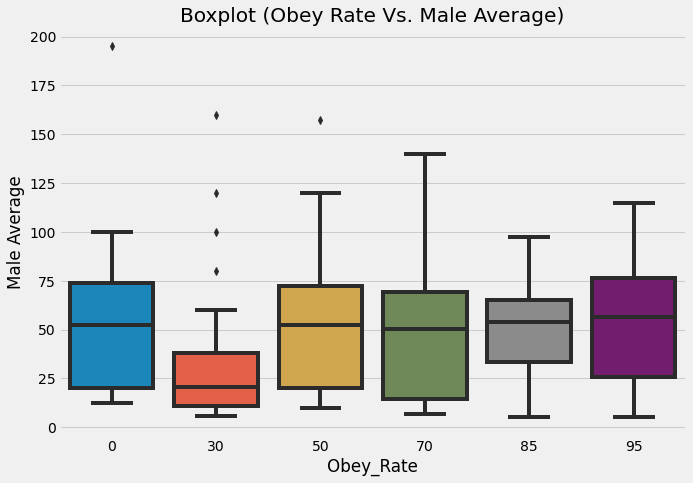

In [76]:
# Step 8a: Plot a boxplot of Male Average vs Obey_Rate
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'Obey_Rate', y ='Male Average', data = final_data)
plt.title('Boxplot (Obey Rate Vs. Male Average)')
plt.show()

There is no evident relationship between intelligence and weight among the female breeds of dogs. It can concluded that the weight/size of a breed cannot be used to determine its intelligence.

In [77]:
classification_grouped = final_data.groupby(['Classification']).agg('median')
classification_grouped

,Obey_Rate,Lower_Reps,Upper_Reps,2018 Rank,2017 Rank,2016 Rank,2015 Rank,2014 Rank,Male Average,Female Average,Rank Change
Classification,,,,,,,,,,,
Above Average Working Dogs,70.0,16.0,25.0,95.5,93.5,90.0,92.0,93.0,50.50,45.00,-3.0
Average Working/Obedience Intelligence,50.0,26.0,40.0,80.0,78.0,82.0,79.0,79.0,52.50,42.50,-1.0
Brightest Dogs,95.0,1.0,4.0,12.5,12.0,11.5,11.5,12.0,56.25,51.25,0.0
Excellent Working Dogs,85.0,5.0,15.0,40.5,42.0,42.0,43.5,48.0,53.75,49.75,1.0
Fair Working/Obedience Intelligence,30.0,41.0,80.0,72.5,75.5,73.5,72.5,74.5,20.75,20.25,-2.5
Lowest Degree of Working/Obedience Intelligence,0.0,81.0,100.0,49.0,50.0,52.0,49.0,50.0,52.50,52.50,-1.0


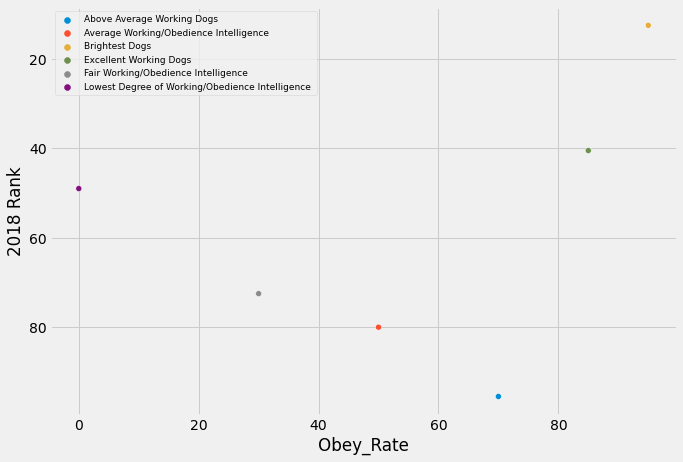

In [78]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'Obey_Rate' , y = '2018 Rank', data = classification_grouped, hue = 'Classification')
plt.legend(loc = 'upper left', prop={'size': 9})
plt.xticks([0, 20, 40, 60, 80])
plt.yticks([20, 40, 60, 80])
plt.gca().invert_yaxis()
plt.show()

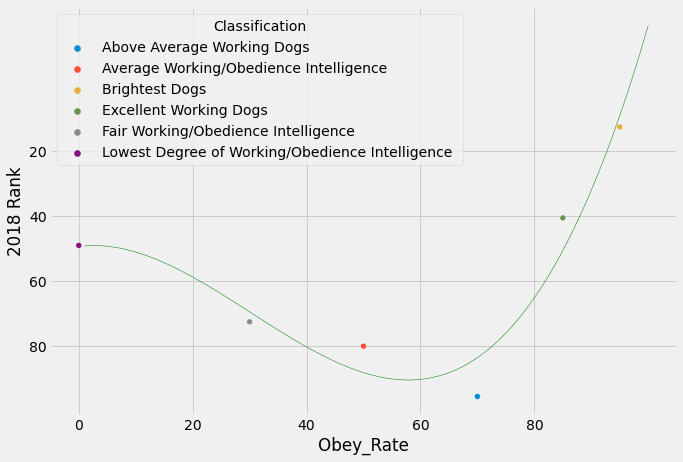

In [79]:
x = classification_grouped['Obey_Rate']
y = classification_grouped['2018 Rank']

model = np.poly1d(np.polyfit(x, y, 3))
polyline = np.linspace(1, 100, 100)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'Obey_Rate' , y = '2018 Rank', data = classification_grouped, hue = 'Classification')
plt.plot(polyline, model(polyline), color = 'green', linewidth = 0.5)
plt.xticks([0, 20, 40, 60, 80])
plt.yticks([20, 40, 60, 80])
plt.gca().invert_yaxis()
plt.show()

In [80]:
grouped_classification_weights = final_data.groupby(['Classification'])['Male Average'].median().sort_values(ascending = False)

Text(0.5, 0, 'Weight (Pounds)')

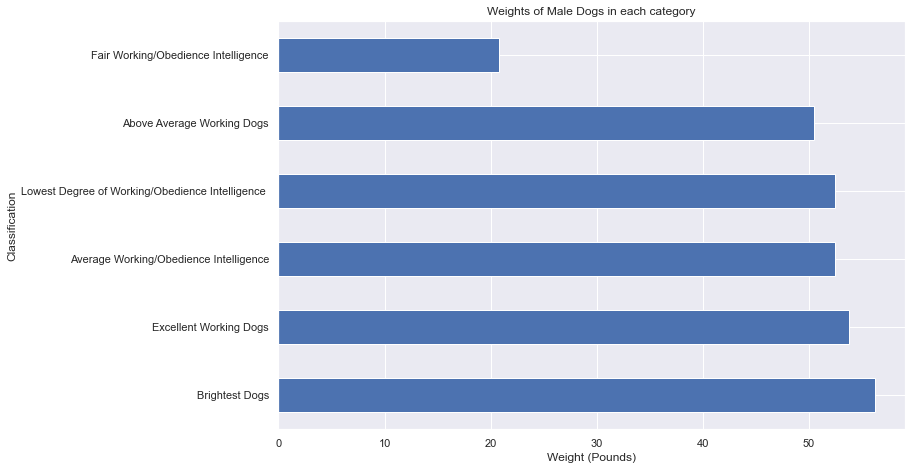

In [81]:
sns.set_theme()
plt.figure(figsize = (10, 7))
ax = grouped_classification_weights.plot(kind = 'barh', title = 'Weights of Male Dogs in each category')
ax.set_xlabel('Weight (Pounds)')

`Brightest Dogs` are the heaviest and `Fair Working/Obedience Intelligence` dogs are the least heaviest. The median was used in calculating the weights by classification because of the presence of extremely heavy dogs (outliers) in the data set.

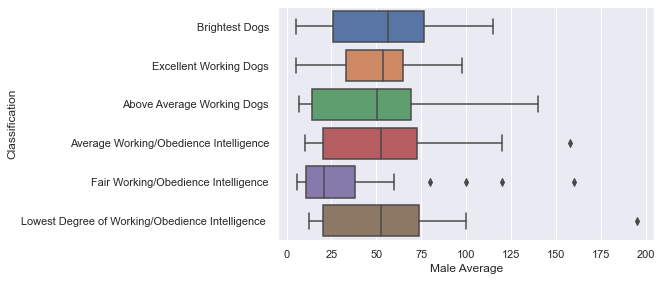

In [82]:
sns.boxplot(y = 'Classification', x = 'Male Average', data = final_data)
#plt.xticks(rotation = 90)
plt.show()

In [83]:
grouped_classification_weights = final_data.groupby(['Classification'])['Female Average'].median().sort_values(ascending = False)

Text(0.5, 0, 'Weight (Pounds)')

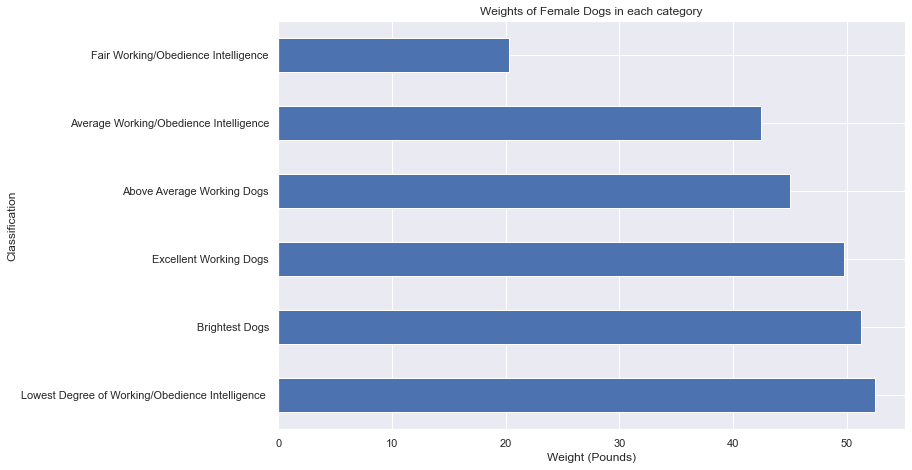

In [84]:
sns.set_theme()
plt.figure(figsize = (10, 7))
ax = grouped_classification_weights.plot(kind = 'barh', title = 'Weights of Female Dogs in each category')
ax.set_xlabel('Weight (Pounds)')

Examining the weights of female and male breeds across the different classifications of breeds. The data will be grouped by `Classification` then the median is calculated for the `Male Average` and `Female Average` columns. This produces the dataframe below.

In [85]:
df_f = final_data.groupby(['Classification'], as_index = False)[['Male Average', 'Female Average']].median()
df_f

,Classification,Male Average,Female Average
0,Above Average Working Dogs,50.50,45.00
1,Average Working/Obedience Intelligence,52.50,42.50
2,Brightest Dogs,56.25,51.25
3,Excellent Working Dogs,53.75,49.75
4,Fair Working/Obedience Intelligence,20.75,20.25
5,Lowest Degree of Working/Obedience Intelligence,52.50,52.50


The dataframe above gives the median weights of the different classification of dog breeds by sex. The columns(`Male Average`&`Female Average`) are renamed to `Male` & `Female` respectively. Then melted using the `.melt` function to put the dataframe into the long format so that the visualizations can be done easily.

In [86]:
df = df_f.rename(columns = {
    'Male Average': 'Male',
    'Female Average':'Female'
})

print(df)
print('')
df_melted = pd.melt(df, id_vars = 'Classification', value_vars = ['Male', 'Female'], var_name = 'Sex', value_name = 'Average Weight')
print(df_melted)

                                     Classification   Male  Female
0                        Above Average Working Dogs  50.50   45.00
1            Average Working/Obedience Intelligence  52.50   42.50
2                                    Brightest Dogs  56.25   51.25
3                            Excellent Working Dogs  53.75   49.75
4               Fair Working/Obedience Intelligence  20.75   20.25
5  Lowest Degree of Working/Obedience Intelligence   52.50   52.50

                                      Classification     Sex  Average Weight
0                         Above Average Working Dogs    Male           50.50
1             Average Working/Obedience Intelligence    Male           52.50
2                                     Brightest Dogs    Male           56.25
3                             Excellent Working Dogs    Male           53.75
4                Fair Working/Obedience Intelligence    Male           20.75
5   Lowest Degree of Working/Obedience Intelligence     Male        

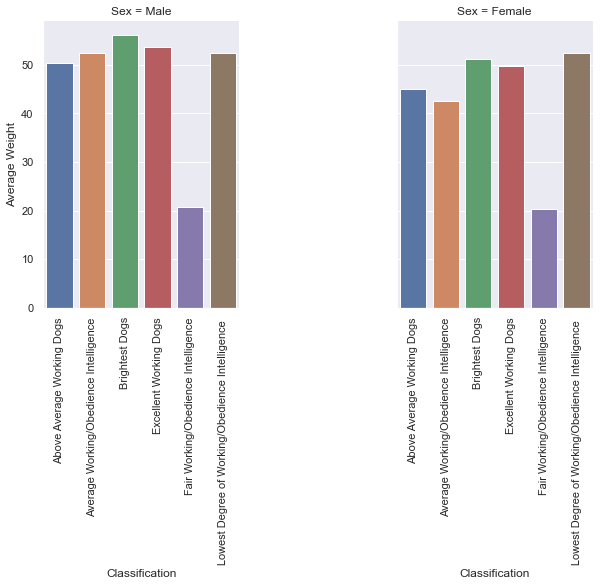

In [87]:
#plt.figure(figsize = (10, 7))
ax = sns.catplot(x = 'Classification', y = 'Average Weight', data = df_melted, kind = 'bar', col = 'Sex')
ax.set_xticklabels(rotation = 90)
plt.show()

Looking at the visualization for male and female dogs across the different classifications, it is evident that male dogs tend to be heavier/bigger than female dogs.